<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Python-Machine-Learning-notebooks/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality reduction on CLASSIFICATION

Reduce number of columns of dataset.

Tidy dataset, that is every columns is a feature. Each row is an observation.

If you have more than 10 features, the dataset is considered **high dimensional**. It could be hard to find the important patterns because of the complexity that comes with high-dimensionality.

Reduce number of columns, also usefull for low-dimensional

## Dataset pokemon and pre-processing

In [ ]:
import pandas as pd

df = pd.read_csv('https://assets.datacamp.com/production/repositories/3515/datasets/9b0682ecacc5a3429f62947794d1adbeecbd5a11/pokemon.csv')

df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
# Leave only Generation 1 pokemons

df = df[df['Generation'] == 1]


In [ ]:
# Describe numerical
display(df.describe())

# Describe only categorical
df.describe(exclude='number')

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.0
mean,75.819277,426.813253,65.819277,76.638554,70.861446,71.819277,69.090361,72.584337,1.0
std,45.153246,115.878076,28.153968,30.744727,28.641336,34.439106,25.505275,29.675857,0.0
min,1.000000,195.000000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.0
25%,36.250000,325.000000,46.500000,55.000000,50.000000,45.000000,50.000000,50.000000,1.0
50%,76.500000,436.500000,62.000000,75.000000,66.000000,65.000000,70.000000,70.000000,1.0
75%,115.000000,500.000000,80.000000,95.000000,85.000000,95.000000,85.000000,92.250000,1.0
max,151.000000,780.000000,250.000000,190.000000,180.000000,194.000000,130.000000,150.000000,1.0


,Name,Type 1,Type 2,Legendary
count,166,166,78,166
unique,166,15,13,2
top,Psyduck,Water,Flying,False
freq,1,31,23,160


In [ ]:
# Droping the column with no variance that is 'Generation' and 'Legendary'
# And we will we working only with 

number_cols = ['HP', 'Attack', 'Defense']
non_number_cols = ['Name', 'Type 1']
# Create a new dataframe by subselecting the chosen features
df_selected = df[number_cols + non_number_cols]
# Prints the first 5 lines of the new dataframe
print(df_selected.head())

   HP  Attack  Defense                   Name Type 1
0  45      49       49              Bulbasaur  Grass
1  60      62       63                Ivysaur  Grass
2  80      82       83               Venusaur  Grass
3  80     100      123  VenusaurMega Venusaur  Grass
4  39      52       43             Charmander   Fire


## Why reduce dimensionality?

Your dataset will:

1- Be less complex

2- Less disk space

3- require less computation time

4- **have lower chance of model overfitting**


Try to minimize the information loss by removing feeatures that are irrelevant or hold little unique information. Feature selection and Feature extraction.

Feature extraction: It has the same goal of reducing dimensionality, instead of selecting a subset of features, will only extract new features from the original ones. This new features has little redundant information in them as possible and are therefore fewer in number.

In [ ]:
import pandas as pd

# Dataset 

ansur_female = pd.read_csv('https://assets.datacamp.com/production/repositories/3515/datasets/802fc5cdbe3a29248483e496a966627ea9629e7a/ANSUR_II_FEMALE.csv')
ansur_male = pd.read_csv('https://assets.datacamp.com/production/repositories/3515/datasets/28edd853c0a6aa7316b0d84a21f8e0d821e5010d/ANSUR_II_MALE.csv')

display(ansur_female.shape)
display(ansur_male.shape)

df = pd.concat([ansur_female,ansur_male])
df.shape

(1986, 99)

(4082, 99)

(6068, 99)

In [ ]:
# he uses pairplot to see redundant features to extract.

sns.pairplot(df, hue='Gender', diag_kind='hist')

NameError: ignored

# t-SNE

t-SNE is super powerful. Use it when you want to visually explore the patterns in a high dimensional dataset.
t-SNE is a great technique for visual exploration of high dimensional datasets.

## T-SNE in ANSUR

In [ ]:
ansur_female.head()

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,...,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Support,Regular Army,Female,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,...,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,152,756,65.7,1.560,26.997041,Overweight,Normal
1,Combat Service Support,Regular Army,Female,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,...,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,155,815,53.4,1.665,19.262506,Normal,Normal
2,Combat Service Support,Regular Army,Female,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,...,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,162,799,66.3,1.711,22.647148,Normal,Tall
3,Combat Service Support,Regular Army,Female,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,...,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,173,818,78.2,1.660,28.378575,Overweight,Normal
4,Combat Arms,Regular Army,Female,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,...,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,152,762,88.6,1.572,35.853259,Overweight,Normal


In [ ]:
non_numeric = ['BMI_class','Height_class','Gender','Component','Branch']

df_numeric = ansur_female.drop(non_numeric,axis=1)

print(df_numeric.shape)
df_numeric.head()


(1986, 94)


,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,...,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,...,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,152,756,65.7,1.560,26.997041
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,...,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,155,815,53.4,1.665,19.262506
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,...,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,162,799,66.3,1.711,22.647148
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,...,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,173,818,78.2,1.660,28.378575
4,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,...,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,152,762,88.6,1.572,35.853259


 Usually learning rates between 10 and 1000 range

 tsne will project our high-dimensional dataset onto a NumPy array with two dimensions

In [ ]:
from sklearn.manifold import TSNE

m = TSNE(learning_rate=50)

tsne_features = m.fit_transform(df_numeric)

#tsne will project our high-dimensional dataset onto a NumPy array with two dimensions
tsne_features[1:4,:]

df_numeric['x'] = tsne_features[:,0]
df_numeric['y'] = tsne_features[:,1]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


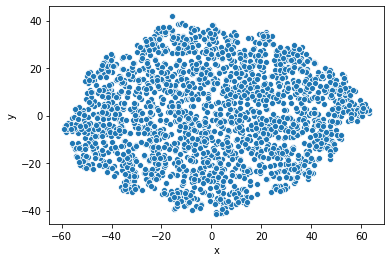

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='x',y='y',data=df_numeric)
plt.show()

# we see a huge and only cluster using only numerical features.
# Maybe adding columns like BMI_class to the dataset will sepparate values as classes

Df with BMI

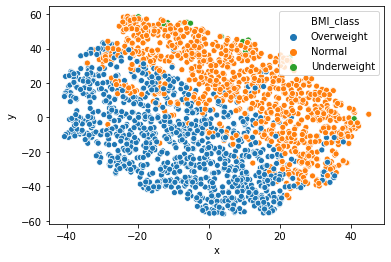

In [ ]:
df_bmi = pd.read_csv('https://assets.datacamp.com/production/repositories/3515/datasets/802fc5cdbe3a29248483e496a966627ea9629e7a/ANSUR_II_FEMALE.csv')
non_numeric = ['Gender','Component','Branch']

df_bmi  = ansur_female.drop(non_numeric,axis=1)

from sklearn.manifold import TSNE

m = TSNE(learning_rate=50)

tsne_features = m.fit_transform(df_numeric)

#tsne will project our high-dimensional dataset onto a NumPy array with two dimensions
tsne_features[1:4,:]

df_bmi['x'] = tsne_features[:,0]
df_bmi['y'] = tsne_features[:,1]

sns.scatterplot(x='x',y='y',hue='BMI_class',data=df_bmi)
plt.show()

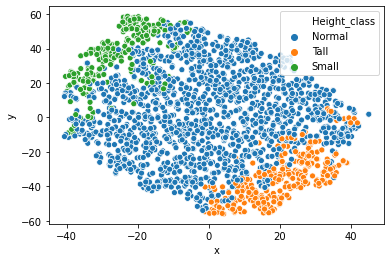

In [ ]:
sns.scatterplot(x='x',y='y',hue='Height_class',data=df_bmi)
plt.show()

## Model tend to overfit badly on high-dimensional data

Try to detect low quality features and drop them (Feature selection)
In fact, every time a dataset has one more feature it should have exponentially more samples to prevent overfitting.

This fenomenon is called curse of dimensionality. If you don't have many observations, it is crucial to apply dimensionality reduction. 


In [ ]:
# Work with ANSUR data of male and female together

# We will try to predict GENDER

import pandas as pd

# Dataset 

ansur_female = pd.read_csv('https://assets.datacamp.com/production/repositories/3515/datasets/802fc5cdbe3a29248483e496a966627ea9629e7a/ANSUR_II_FEMALE.csv')
ansur_male = pd.read_csv('https://assets.datacamp.com/production/repositories/3515/datasets/28edd853c0a6aa7316b0d84a21f8e0d821e5010d/ANSUR_II_MALE.csv')

display(ansur_female.shape)
display(ansur_male.shape)

ansur_df = pd.concat([ansur_female,ansur_male])
ansur_df.shape

(1986, 99)

(4082, 99)

(6068, 99)

In [ ]:
non_numeric = ['BMI_class','Height_class','Component','Branch']
ansur_df = pd.get_dummies(data= ansur_df, columns=non_numeric)


In [ ]:
ansur_df.shape


(6068, 107)

In [ ]:
# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the Gender column as the feature to be predicted (y)
y = ansur_df['Gender']

# Remove the Gender column to create the training data
X = ansur_df.drop('Gender', axis=1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

1821 rows in test set vs. 4247 in training set. 106 Features.


In [ ]:
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

98.5% accuracy on test set vs. 99.0% on training set


## Accuracy after dimensionality reduction

Here we are computing a model SVC with all rows that are more than 6000. In Datacamp it computes with only 1000 therefore the model got overfitted.

Will proceed with dimensionality reduction to create a more accurate model.

The model badly overfits when we feed it too many features. e.g. it overlooks that neck circumference by itself is pretty different for males and females.
With neck circumference a model prediction on 1000 observation has an accuracy of 93.3%


# Dropping Features with missing values or little variance

Low variance features are so similar between different observations that they may contain little information to use in analysis.

There is a sklearn tool called VarianceThreshold()*texto en cursiva*


## Little Variance on Features

In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Dataset 

ansur_female = pd.read_csv('https://assets.datacamp.com/production/repositories/3515/datasets/802fc5cdbe3a29248483e496a966627ea9629e7a/ANSUR_II_FEMALE.csv')
ansur_male = pd.read_csv('https://assets.datacamp.com/production/repositories/3515/datasets/28edd853c0a6aa7316b0d84a21f8e0d821e5010d/ANSUR_II_MALE.csv')
ansur_df = pd.concat([ansur_female,ansur_male])
print(ansur_df.shape)

non_numeric = ['BMI_class','Gender','Height_class','Component','Branch']

ansur_categorical = ansur_df[non_numeric]
ansur_numeric = ansur_df.drop(non_numeric,axis=1)

# Normalize just dividing mean, we want variance to keep the same not reduced like standization
normalized_df = ansur_numeric/ansur_numeric.mean()

print(normalized_df.var())


(6068, 99)
abdominalextensiondepthsitting    0.023026
acromialheight                    0.003164
acromionradialelength             0.004006
anklecircumference                0.005095
axillaheight                      0.003071
                                    ...   
wristcircumference                0.006031
wristheight                       0.003295
weight_kg                         0.038563
stature_m                         0.002757
BMI                               0.022027
Length: 94, dtype: float64


In [ ]:
# Select a VarianceThreshold of 0.005.
# The variance we ask in threshold is really low because data is NORMALIZED
sel = VarianceThreshold(threshold=0.005) # Variance of 0.005 

sel.fit(normalized_df)

# we create a mask of the feature that has variance above 1.
# we can feature select with the .loc method
mask = sel.get_support()
print(mask)
# we can feature select with the .loc method
reduced_df = ansur_numeric.loc[:,mask]

print("Dimensionality reduced from {} to {}.".format(ansur_numeric.shape[1], reduced_df.shape[1]))

[ True False False  True False False False  True  True False  True  True
 False False False  True  True False False False  True False  True  True
  True False False  True  True  True  True  True  True False False False
 False  True  True False False  True  True False False False False False
  True  True  True False False  True  True False False False  True  True
 False  True  True False False  True  True  True False  True False False
 False False False False  True  True False False False False False  True
  True  True  True  True False  True False  True False  True]
Dimensionality reduced from 94 to 45.


In [ ]:
df = pd.concat([reduced_df,ansur_categorical],axis=1)
df.shape

(6068, 50)

## Features with missing values

When a high % of observations has NaN on that feature. It's better to drop it.

In [ ]:
#  Identify Nan with boolean

# Adds all NaN values in a column.
display(ansur_df.isna().sum())

# Shows ratio of missing values by total observations
display(ansur_df.isna().sum() / len(ansur_df))

Branch                            0
Component                         0
Gender                            0
abdominalextensiondepthsitting    0
acromialheight                    0
                                 ..
weight_kg                         0
stature_m                         0
BMI                               0
BMI_class                         0
Height_class                      0
Length: 99, dtype: int64

Branch                            0.0
Component                         0.0
Gender                            0.0
abdominalextensiondepthsitting    0.0
acromialheight                    0.0
                                 ... 
weight_kg                         0.0
stature_m                         0.0
BMI                               0.0
BMI_class                         0.0
Height_class                      0.0
Length: 99, dtype: float64

Let's say we have some feature that have more than x% of observations as NaN values


In [ ]:
# Create a boolean mask on whether each feature less than 50% missing values.
mask = df.isna().sum() / len(df) < 0.5

# Create a reduced dataset by applying the mask
reduced_df = df.loc[:,mask]

print(df.shape)
print(reduced_df.shape)


## Correlation between features (Pairwise correlation)

We can see correlation between features in sns.pairplot, but we don't know the actual correlation value.

Pearson correlation between -1 and 1.
 0 no correlation at all.

In the correlation matrix we need to look at the peaston correlation that is near 1 (without looking at the correlation of 1 of the diagonal)

### Correlation Matrix

Here we are going to only filter by some features because we have 90.

In [ ]:
# Display what is called 'Correlation Matrix'
df = ansur_df.loc[:,['elbowrestheight', 'wristcircumference', 'anklecircumference', 'buttockheight', 'crotchheight']]
df.corr()

,elbowrestheight,wristcircumference,anklecircumference,buttockheight,crotchheight
elbowrestheight,1.000000,0.294753,0.301963,-0.007013,-0.026090
wristcircumference,0.294753,1.000000,0.702178,0.576679,0.606582
anklecircumference,0.301963,0.702178,1.000000,0.367548,0.386502
buttockheight,-0.007013,0.576679,0.367548,1.000000,0.929411
crotchheight,-0.026090,0.606582,0.386502,0.929411,1.000000


### Seaborn HeatMap function


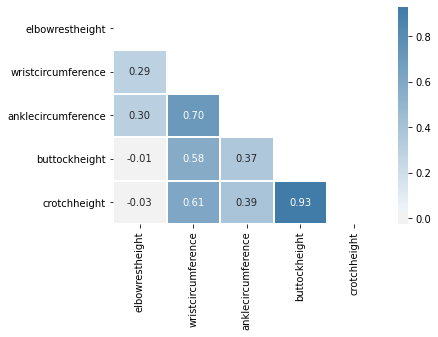

In [ ]:
import numpy as np

corr = df.corr()

# Let's make a mask to ignore identity and upper triangle duplicate values.
# triu comes for uppertriangle
mask = np.triu(np.ones_like(corr,dtype=bool))

cmap = sns.diverging_palette(h_neg=10,h_pos=240,as_cmap=True)

sns.heatmap(corr,mask=mask,center=0, cmap=cmap, linewidths=1,annot=True,fmt='.2f')
plt.show()

### Removing highly correlated features manually

here we are going to filter and drop one of each pair of features that has correlation near -1 or 1

Be careful about droping features. You need to have a good understanding of the data set, furthermore remember that pearson correlation only works for linear relationships. Vizually check your data

But never misunderstand correlation vs causation. Correlation doesn't mean causation. e.g. pool drownings and nuclear energy 0.9 correlation. 

In [ ]:
# we are going to use ANSUR male
print(ansur_male.shape)
ansur_male.head()

(4082, 99)


,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,...,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,...,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,...,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,...,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal
3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,...,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,176,793,79.4,1.655,28.988417,Overweight,Normal
4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,...,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,188,954,94.6,1.914,25.823034,Overweight,Tall


In [ ]:
import numpy as np 

# Calculate the correlation matrix and take the absolute value
corr_matrix = ansur_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]

# you can use this filtering for selecting columns that has more de x% of correlation
# and with only those columns plot the heat map and plot type of relationship
# between features (linear or not linear)

# Drop the features in the to_drop list
reduced_df = ansur_df.drop(to_drop, axis=1)

print("The reduced_df dataframe has {} columns".format(reduced_df.shape[1]))

The reduced_df dataframe has 80 columns


In [ ]:
to_drop # or columns to filter

['abdominalextensiondepthsitting',
 'acromialheight',
 'acromionradialelength',
 'axillaheight',
 'balloffootlength',
 'buttockheight',
 'cervicaleheight',
 'chestheight',
 'eyeheightsitting',
 'forearmcenterofgriplength',
 'handbreadth',
 'iliocristaleheight',
 'interscyei',
 'kneeheightmidpatella',
 'kneeheightsitting',
 'neckcircumference',
 'suprasternaleheight',
 'waistbreadth',
 'waistcircumference']

# Selecting features for model performance

## Manually feature droping through modeling

** DON'T DROP ALL UNIMPORTANT FEATURES AT ONCE, DO IT ONE BY ONE, fitting the model with every iteration. Because parameters change in every drop.

In [ ]:
import pandas as pd

df = pd.read_csv('https://assets.datacamp.com/production/repositories/3515/datasets/87ced33d5371cdc13f9301ecb99ead36a63c8197/PimaIndians.csv')
display(df.head())

y = df['test']

X = df.drop('test',axis=1)


,pregnant,glucose,diastolic,triceps,insulin,bmi,family,age,test
0,1,89,66,23,94,28.1,0.167,21,negative
1,0,137,40,35,168,43.1,2.288,33,positive
2,3,78,50,32,88,31.0,0.248,26,positive
3,2,197,70,45,543,30.5,0.158,53,positive
4,1,189,60,23,846,30.1,0.398,59,positive


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
lr = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Fit the logistic regression model on the scaled training data
lr.fit(X_train_std, y_train)

# Scale the test features
X_test_std = scaler.transform(X_test)

# Predict diabetes presence on the scaled test set
y_pred = lr.predict(X_test_std)

# Prints accuracy metrics and feature coefficients
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred))) 
display(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))


71.2% accuracy on test set.


{'age': 0.31,
 'bmi': 0.64,
 'diastolic': 0.13,
 'family': 0.13,
 'glucose': 1.32,
 'insulin': 0.18,
 'pregnant': 0.2,
 'triceps': 0.1}

In [ ]:
# Diastolic has a very low coefficient in the model.
# droping the feature, we generate a higher accuracy model of 
# 76.3% accuracy on test set.

X = X.drop('diastolic',axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Fit the logistic regression model on the scaled training data
lr.fit(X_train_std, y_train)

# Scale the test features
X_test_std = scaler.transform(X_test)

# Predict diabetes presence on the scaled test set
y_pred = lr.predict(X_test_std)

# Prints accuracy metrics and feature coefficients
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred))) 
display(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

70.3% accuracy on test set.


{'age': 0.17,
 'bmi': 0.39,
 'family': 0.4,
 'glucose': 1.11,
 'insulin': 0.09,
 'pregnant': 0.47,
 'triceps': 0.26}

## RFE of Scikit-Learn (Automatic Recursive Feature Elimination)



In [ ]:
from sklearn.feature_selection import RFE

# Create the RFE with a LogisticRegression estimator and 3 features to select
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1)

# Fit the eliminator to the data
rfe.fit(X_train, y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))

# Print the 3 features that are not eliminated
print(X.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc)) 

Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
{'pregnant': 1, 'glucose': 2, 'triceps': 4, 'insulin': 5, 'bmi': 1, 'family': 1, 'age': 3}
Index(['pregnant', 'bmi', 'family'], dtype='object')
75.4% accuracy on test set.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Feature importance through Random Forest

### Manually through .feature_importances_

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Perform a 75% training and 25% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fit the random forest model to the training data
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Calculate the test set accuracy
acc = accuracy_score(y_test, rf.predict(X_test))

# Print the importances per feature
print(dict(zip(X.columns, rf.feature_importances_.round(2))))

# Print accuracy
print("{0:.1%} accuracy on test set.".format(acc)) 

{'pregnant': 0.07, 'glucose': 0.28, 'triceps': 0.1, 'insulin': 0.15, 'bmi': 0.14, 'family': 0.12, 'age': 0.14}
80.6% accuracy on test set.


In [ ]:
# Create a mask for features importances above the threshold
mask = rf.feature_importances_ > 0.15

# Apply the mask to the feature dataset X
reduced_X = X.loc[:,mask]

# prints out the selected column names
print(reduced_X.columns)

Index(['glucose'], dtype='object')


### RFE Random Forest Classifier

wrap a Recursive Feature Eliminator around a random forest model to remove features step by step. This method is more conservative compared to selecting features after applying a single importance threshold. Since dropping one feature can influence the relative importances of the others.

In [ ]:
from sklearn.feature_selection import RFE
# Set the feature eliminator to remove 2 features on each step
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, step=2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

# Create a mask
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc)) 

Fitting estimator with 7 features.
Fitting estimator with 5 features.
Fitting estimator with 3 features.
Index(['glucose', 'bmi'], dtype='object')
71.4% accuracy on test set.


# Dimensionality reduction on LINEAR MODEL

## Lasso 

In [ ]:
# Les make BMI our target variable

ansur_male = pd.read_csv('https://assets.datacamp.com/production/repositories/3515/datasets/28edd853c0a6aa7316b0d84a21f8e0d821e5010d/ANSUR_II_MALE.csv')
ansur_male.shape

(4082, 99)

In [ ]:
y= ansur_male.BMI

X = ansur_male.drop('BMI',axis=1)

non_numeric = ['BMI_class','Gender','Height_class','Component','Branch']
X = pd.get_dummies(data=X, columns=non_numeric)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()

# Set the test size to 30% to get a 70-30% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Create the Lasso model for alpha 1 that is the default value.
la = Lasso(alpha=0.1)

# Fit it to the standardized training data
la.fit(X_train_std, y_train)

# Transform the test set with the pre-fitted scaler
X_test_std = scaler.transform(X_test)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(X_test_std, y_test)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

The model can predict 99.2% of the variance in the test set.
The model has ignored 88 out of 106 features.


We can predict almost 85% of the variance in the BMI value using just 9 out of 91 of the features. The R^2 could be higher though.

We can get alpha= 0.1 and would return **98.3% R2** with only 18 of 91 features.

### LassoCV to automate alpha tuning

With LassoCV we can make Lasso to compute feature importance and the best parameter of alpha. Balance between removing as much features as possible and model accuracy.

Is better to reduce dimensionality not just with one model but with an ensemble. So what we are doing first is to make a LassoCV model, where it fits and calculates the best alpha parameter. We take the number of features that has been selected by LassoCV model (e.g 66 features), after that insert that number into a RFE (n_features_to_select=66) with RandomForestRegressor. Then do the same with RFE (n_features_to_select=66) with GradientBoostingRegressor (is an ensemble method per se). At last we have 3 masks with feature importances we sum and check votes of 0,1,2 or 3.



In [ ]:
# Les make biceps circumference our target variable

ansur_male = pd.read_csv('https://assets.datacamp.com/production/repositories/3515/datasets/28edd853c0a6aa7316b0d84a21f8e0d821e5010d/ANSUR_II_MALE.csv')
ansur_male.shape

y= ansur_male['bicepscircumferenceflexed']

X = ansur_male.drop('bicepscircumferenceflexed',axis=1)

non_numeric = ['BMI_class','Gender','Height_class','Component','Branch']
X = pd.get_dummies(data=X, columns=non_numeric)


In [ ]:
# First LassoCV

from sklearn.linear_model import LassoCV

# Create and fit the LassoCV model on the training set
lcv = LassoCV()
lcv.fit(X_train, y_train)
print('Optimal alpha = {0:.3f}'.format(lcv.alpha_))

# Calculate R squared on the test set
r_squared = lcv.score(X_test, y_test)
print('The model explains {0:.1%} of the test set variance'.format(r_squared))

# Create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_ != 0
print('{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))

Optimal alpha = 0.404
The model explains 99.1% of the test set variance
38 features out of 106 selected


## Second GradiendBoostingRegressor

In [ ]:
# Second GradiendBoostingRegressor

from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# Select sum(lcv_mask) features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=sum(lcv_mask), step=3, verbose=1)
rfe_gb.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_gb.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
gb_mask = rfe_gb.support_

Fitting estimator with 106 features.
Fitting estimator with 103 features.
Fitting estimator with 100 features.
Fitting estimator with 97 features.
Fitting estimator with 94 features.
Fitting estimator with 91 features.
Fitting estimator with 88 features.
Fitting estimator with 85 features.
Fitting estimator with 82 features.
Fitting estimator with 79 features.
Fitting estimator with 76 features.
Fitting estimator with 73 features.
Fitting estimator with 70 features.
Fitting estimator with 67 features.
Fitting estimator with 64 features.
Fitting estimator with 61 features.
Fitting estimator with 58 features.
Fitting estimator with 55 features.
Fitting estimator with 52 features.
Fitting estimator with 49 features.
Fitting estimator with 46 features.
Fitting estimator with 43 features.
Fitting estimator with 40 features.
The model can explain 98.0% of the variance in the test set


In [ ]:
from sklearn.metrics import mean_squared_log_error

# Calculate the R squared on the test set
msq = mean_squared_log_error(X_test, rfe_gb.predict(X_train), multioutput='raw_values')
msq = mean_squared_log_error(X_test, rfe_gb.predict(X_train), multioutput='raw_values')


NameError: ignored

In [ ]:
# Third RandomForestRegressor

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Select sum(lcv_mask) features with RFE on a RandomForestRegressor, drop 3 features on each step
rfe_rf = RFE(estimator=RandomForestRegressor(), 
             n_features_to_select=sum(lcv_mask), step=3, verbose=1)
rfe_rf.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_rf.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
rf_mask = rfe_rf.support_


Fitting estimator with 106 features.
Fitting estimator with 103 features.
Fitting estimator with 100 features.
Fitting estimator with 97 features.
Fitting estimator with 94 features.
Fitting estimator with 91 features.
Fitting estimator with 88 features.
Fitting estimator with 85 features.
Fitting estimator with 82 features.
Fitting estimator with 79 features.
Fitting estimator with 76 features.
Fitting estimator with 73 features.
Fitting estimator with 70 features.
Fitting estimator with 67 features.
Fitting estimator with 64 features.
Fitting estimator with 61 features.
Fitting estimator with 58 features.
Fitting estimator with 55 features.
Fitting estimator with 52 features.
Fitting estimator with 49 features.
Fitting estimator with 46 features.
Fitting estimator with 43 features.
Fitting estimator with 40 features.
The model can explain 97.6% of the variance in the test set


In [ ]:
# Fourth Step: Voting

# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes >= 3

# Apply the dimensionality reduction on X
X_reduced = X.loc[:, meta_mask]
X_reduced.columns

Index(['abdominalextensiondepthsitting', 'axillaheight', 'bicristalbreadth',
       'buttockdepth', 'buttockheight', 'cervicaleheight', 'chestdepth',
       'chestheight', 'forearmforearmbreadth', 'forearmhandlength',
       'mentonsellionlength', 'neckcircumferencebase', 'radialestylionlength',
       'sleevelengthspinewrist', 'tenthribheight', 'thighclearance',
       'thumbtipreach', 'tragiontopofhead', 'waistdepth',
       'waistfrontlengthsitting', 'wristcircumference', 'stature_m'],
      dtype='object')

# Feature Extraction

Feature extraction calculates new features based on the existing one. 

On Feature selection some features are dropped completely.

Feature extraction creates new features with combinations of existing ones. Powerful tools that will calculate new features. **You need to know dataset really well**.

For example BMI is the calculation between weight and height. Use BMI and drop the others.

Other example is to use average of features. e.g. right arm length, left arm length. only one average feature. There is a cost to use average of two features, depending on the variance between 2 features.

For example if we are comparing leg lenght and arm length there is high variance. Instead of taking the mean, there is an alternative technique: **PCA**.

PCA: is important to SCALE feature first. (with StandardScaler). Reference correlation and variance with two vectors (coordinates to points). This reference systems is called **Principal Components**.--> **PCA** is Principal Component Analysis.


## Combination of existing features

In [ ]:
import pandas as pd

sales_df = pd.read_csv('https://assets.datacamp.com/production/repositories/3515/datasets/236dfa1d124bf01147dd5b3da595066fcf84a1a4/grocery_sales.csv')
sales_df.head()

,storeID,product,quantity,revenue
0,A,Apples,1811,9300.6
1,A,Bananas,1003,3375.2
2,A,Oranges,1604,8528.5
3,B,Apples,1785,9181.0
4,B,Bananas,944,3680.2


In [ ]:
# For example You want to compare prices for specific products between stores.
# It's more important to know average price sold.

# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df['revenue'] / sales_df['quantity']

# Drop the quantity and revenue features
reduced_df = sales_df.drop(['revenue', 'quantity'], axis=1)

print(reduced_df.head())

  storeID  product     price
0       A   Apples  5.135616
1       A  Bananas  3.365105
2       A  Oranges  5.317020
3       B   Apples  5.143417
4       B  Bananas  3.898517


## PCA

**PCA is NOT the preferred algorithm to reduce the dimensionality of categorical datasets. But we can check if they align with the most important sources of variance in the data**

Before doing anything with PCA --> Use StarndarScaler()

PCA removes correlation between features. Taking vectors of principal components (coordinates).

The components of PCA are much harder to understand than original features.
You can describe 100 feature dataset with 100 principal components.
Why do I want to do such thing? The components are much more difficult to understand but components share no duplicate information and that they are ranked for most to least important. We can acces the explained variance ratio of each principal component after fitting the algorithm to the data.


In [ ]:
# Les make Gender our target variable

# Dataset 

ansur_female = pd.read_csv('https://assets.datacamp.com/production/repositories/3515/datasets/802fc5cdbe3a29248483e496a966627ea9629e7a/ANSUR_II_FEMALE.csv')
ansur_male = pd.read_csv('https://assets.datacamp.com/production/repositories/3515/datasets/28edd853c0a6aa7316b0d84a21f8e0d821e5010d/ANSUR_II_MALE.csv')

display(ansur_female.shape)
display(ansur_male.shape)

ansur_df = pd.concat([ansur_female,ansur_male])

mapping = {'Female':0,'Male':1}
ansur_df.Gender = ansur_df.Gender.map(mapping)


non_numeric = ['BMI_class','Height_class','Component','Branch']
ansur_df = pd.get_dummies(data=ansur_df, columns=non_numeric)
print(ansur_df.shape)

y= ansur_df['Gender']

X = ansur_df.drop('Gender',axis=1)

# Import train_test_split()
from sklearn.model_selection import train_test_split

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


(1986, 99)

(4082, 99)

(6068, 107)


In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create the scaler and standardize the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pca.fit_transform(ansur_std)

#Explain variance ratio cumulatively
print(pca.explained_variance_ratio_.cumsum())

[0.50571192 0.6299911  0.67964412 0.70859059 0.72916563 0.74724224
 0.76278221 0.7771437  0.7901157  0.80187621 0.81318405 0.82334502
 0.83323667 0.84271916 0.85188482 0.86040145 0.86835544 0.87588896
 0.88292206 0.88878045 0.89439769 0.89992196 0.90517948 0.91020825
 0.91521576 0.91976583 0.92402549 0.92807202 0.93190507 0.93554222
 0.93912424 0.94244974 0.9456695  0.94853003 0.95127982 0.95379022
 0.95626119 0.95866282 0.96088154 0.96286508 0.96475524 0.96652695
 0.96824809 0.96994157 0.97156435 0.97307615 0.97447567 0.97580725
 0.97708857 0.9783239  0.97946046 0.98057886 0.98168172 0.98267888
 0.98362907 0.98454762 0.98542909 0.98626583 0.9870639  0.98783212
 0.98858784 0.98925501 0.98989511 0.99048972 0.991062   0.99162801
 0.99212511 0.99260411 0.99305977 0.99349864 0.99391053 0.99430123
 0.99466128 0.99500611 0.99533025 0.99564504 0.99593444 0.9962155
 0.99648716 0.99675404 0.99701836 0.997257   0.99748831 0.99770093
 0.99790413 0.9980993  0.99827952 0.99845472 0.99862428 0.99878

In [ ]:
# how many principal components to I have to keep in order to explain 90%
# of variances

explain = [0.7,0.8,0.9,0.95,0.98]
for percentage in explain:
  mask = pca.explained_variance_ratio_.cumsum()> percentage
  num_features = sum(mask) - len(mask) -1
  print('To explain more than {}% of variances PCA uses {} numbers of features'.format(percentage*100, -num_features))

To explain more than 70.0% of variances PCA uses 4 numbers of features
To explain more than 80.0% of variances PCA uses 10 numbers of features
To explain more than 90.0% of variances PCA uses 23 numbers of features
To explain more than 95.0% of variances PCA uses 35 numbers of features
To explain more than 98.0% of variances PCA uses 52 numbers of features


## Plot principal components

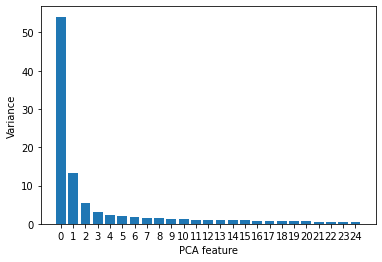

In [ ]:
#Plot first 25 components
features = range(pca.n_components_)
variance = pca.explained_variance_

num_features = 25

plt.bar(features[:num_features], variance[:num_features])
plt.xticks(features[:num_features])
plt.ylabel('Variance')
plt.xlabel('PCA feature')
plt.show()

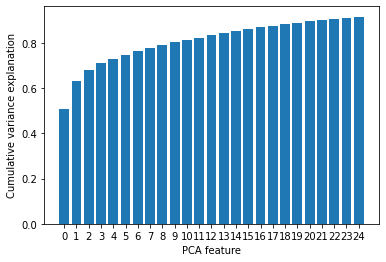

In [ ]:
# Plot cumulative

#Plot first 25 components
features = range(pca.n_components_)
cum = pca.explained_variance_ratio_.cumsum()

num_features = 25

plt.bar(features[:num_features], cum[:num_features])
plt.xticks(features[:num_features])
plt.ylabel('Cumulative variance explanation')
plt.xlabel('PCA feature')
plt.show()

## After PCA analysis we put it into model

### With only 4 features we have an accuracy score of 99%


To improve understanding of the components we should use the components_ attribute (pca.components_)



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# We select 4 features that explained 70% of dataset variance
num_features = 4

pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('PCA', PCA(n_components=num_features)),
                     ('classifier', RandomForestClassifier())  ])

pipeline.fit(X_train,y_train)

# In a pipeline, how to get to the fitted PCA model?
# Here we see in step[1] it is the PCA, and we need to get to the model, 
# not the name, so we need steps[1][1]
print(pipeline.steps[1])
print(pipeline.steps[1][1])
print(pipeline.steps[1][1].explained_variance_ratio_.cumsum())


# With only 4 features we have an accuracy score of 99% !!!!!!!
print(pipeline.score(X_test,y_test))

('PCA', PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False))
PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
[0.50174157 0.62995089 0.67715353 0.70651767]
0.9923119165293794


## Setting an explained variance threshold


If I want to get 90% of explained variance I ask PCA to give me the number of variables the model should have. 



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# We select 90% of dataset variance
explained_variance_threshold = 0.9

pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('PCA', PCA(n_components=explained_variance_threshold)),
                     ('classifier', RandomForestClassifier())  ])

pipeline.fit(X_train,y_train)

# In a pipeline, how to get to the fitted PCA model?
# Here we see in step[1] it is the PCA, and we need to get to the model, 
# not the name, so we need steps[1][1]
print(pipeline.steps[1])
print(pipeline.steps[1][1])
print('Number of features to explain 90% of variance: ', len(pipeline.steps[1][1].components_))
print(pipeline.steps[1][1].explained_variance_ratio_.cumsum())


# With only 4 features we have an accuracy score of 99% !!!!!!!
print(pipeline.score(X_test,y_test))

('PCA', PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False))
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
Number of features to explain 90% of variance:  23
[0.50174157 0.62995089 0.67715353 0.70651767 0.7272936  0.74566624
 0.76123434 0.77561611 0.78883386 0.80083882 0.81233804 0.82261999
 0.83270109 0.84209426 0.85142458 0.86020676 0.86825281 0.87576665
 0.88281198 0.88879223 0.8944632  0.89997416 0.90530155]
0.9917627677100495


## But, how many components should I pick?

**Check the elbow in plot**

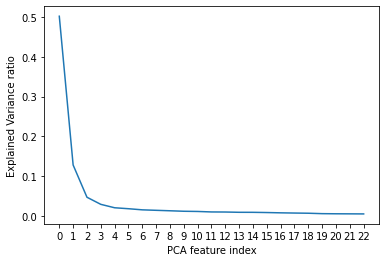

In [ ]:
#Plot first 25 components
features = range(pipeline.steps[1][1].n_components_)
variance = pipeline.steps[1][1].explained_variance_ratio_

num_features = 25

plt.plot(features[:num_features], variance[:num_features])
plt.xticks(features[:num_features])
plt.ylabel('Explained Variance ratio')
plt.xlabel('PCA feature index')
plt.show()

# In this dataset DataCamp says I should pick 3 components. 0,1 and 2 on PCA index.

## How to go back from Principal Components to the features again.

You've reduced the size of the data X fold but were able to reconstruct images with reasonable quality.

pca.inverse_transform()